In [191]:
import pandas as pd
import numpy as np
import numpy
from matplotlib import pyplot as plt
import tensorflow.keras as keras
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("GNW.CSV")

In [192]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [193]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
df=pd.read_csv('covid_19_india.csv')

In [194]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.toordinal)
df1=df.groupby(df['Date']).sum()
x=df1['Deaths'].values
y=df['Date'].unique()
x,y

(array([     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      1,      2,      2,      2,      3,
             3,      4,      4,      4,      7,      7,      9,     10,
            15,     17,     19,     27,     31,     35,     41,     53,
            62,     75,     83,    111,    124,    149,    169,    206,
           242,    273,    324,    353,    392,    420,    452,    488,
           519,    559,    603,    652,    686,    723,    779,    826,
           886,    937,   1008,   1075,   1152,   1218,   1306,   1389,
          1583,   1694,   1783,   1886,   1981,   2109,   2206,   2293,
          2415,   2549,   2649,   2752,   2872,   3029,   3163, 

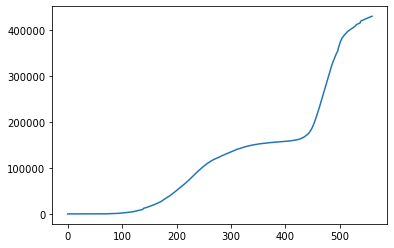

In [195]:
plt.plot(x)

In [196]:
x

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      1,      2,      2,      2,      3,
            3,      4,      4,      4,      7,      7,      9,     10,
           15,     17,     19,     27,     31,     35,     41,     53,
           62,     75,     83,    111,    124,    149,    169,    206,
          242,    273,    324,    353,    392,    420,    452,    488,
          519,    559,    603,    652,    686,    723,    779,    826,
          886,    937,   1008,   1075,   1152,   1218,   1306,   1389,
         1583,   1694,   1783,   1886,   1981,   2109,   2206,   2293,
         2415,   2549,   2649,   2752,   2872,   3029,   3163,   3303,
      

In [197]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

In [198]:
scaler1=MinMaxScaler(feature_range=(0,1))
scaler1

MinMaxScaler()

In [199]:
x=scaler.fit_transform(np.array(x).reshape(-1,1))

In [200]:
y=scaler.fit_transform(np.array(x).reshape(-1,1))

In [201]:
import numpy
def create_dataset(dataset,y, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		b= dataset[i:(i+time_step)]
		dataY.append(b)
	return numpy.array(dataX), numpy.array(dataY)

In [202]:
x

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [203]:
len(x)

560

In [204]:
X_train, y_train = create_dataset(x,y, time_step=100)
X_test, ytest = create_dataset(x,y, time_step=100)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [205]:
X_train.shape

(459, 100, 1)

In [206]:
from keras import Sequential
import keras

In [207]:
from keras.layers import LSTM ,Input ,Dense

In [210]:
model=Sequential([
    LSTM(50,input_shape=X_train.shape[1:],return_sequences=True),
    LSTM(50,return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.MeanSquaredError())
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_34 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [211]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
8/8 [==============================] - 8s 397ms/step - loss: 0.0959 - val_loss: 0.0606
Epoch 2/10
8/8 [==============================] - 1s 182ms/step - loss: 0.0543 - val_loss: 0.0474
Epoch 3/10
8/8 [==============================] - 1s 178ms/step - loss: 0.0457 - val_loss: 0.0436
Epoch 4/10
8/8 [==============================] - 1s 180ms/step - loss: 0.0427 - val_loss: 0.0414
Epoch 5/10
8/8 [==============================] - 1s 183ms/step - loss: 0.0407 - val_loss: 0.0397
Epoch 6/10
8/8 [==============================] - 1s 179ms/step - loss: 0.0391 - val_loss: 0.0383
Epoch 7/10
8/8 [==============================] - 1s 180ms/step - loss: 0.0377 - val_loss: 0.0368
Epoch 8/10
8/8 [==============================] - 1s 177ms/step - loss: 0.0362 - val_loss: 0.0351
Epoch 9/10
8/8 [==============================] - 1s 179ms/step - loss: 0.0346 - val_loss: 0.0336
Epoch 10/10
8/8 [==============================] - 1s 179ms/step - loss: 0.0330 - val_loss: 0.0321


In [183]:
y[1]

array([0.])

In [184]:
X_train[0]

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [185]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

15/15 [==============================] - 1s 33ms/step


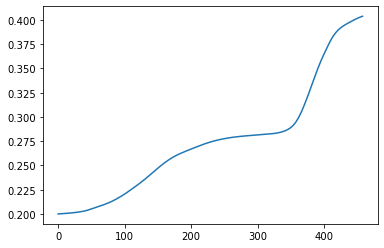

In [212]:
plt.plot(train_predict)